## Name :- Pravin Nandankar
## Roll No : 58
## Practical 2 :- Machine learning
## Batch :- C4

#### Import The Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("carData.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
# check for duplicates
df.duplicated().sum()

2

In [9]:
# drop duplicates
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
# Creating 'Age' from 'Year'
df['Age'] = 2024 - df['Year']

# Select relevant features and target
features = ['Age', 'Present_Price']
X = df[features]
y = df['Selling_Price']

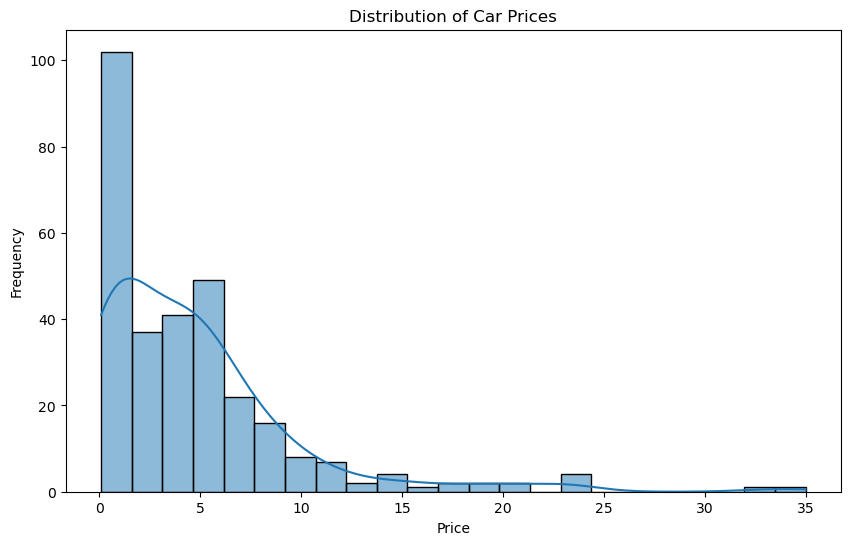

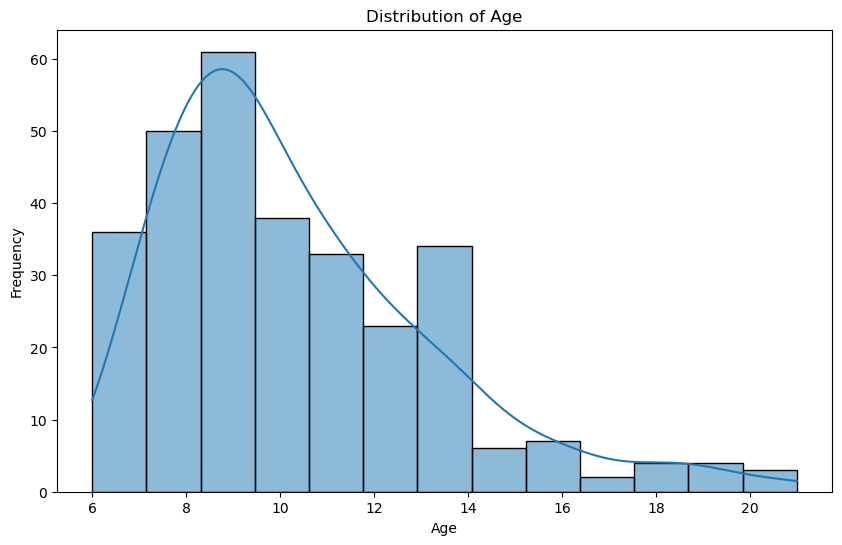

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of numerical features
numerical_features = ['Age',]
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


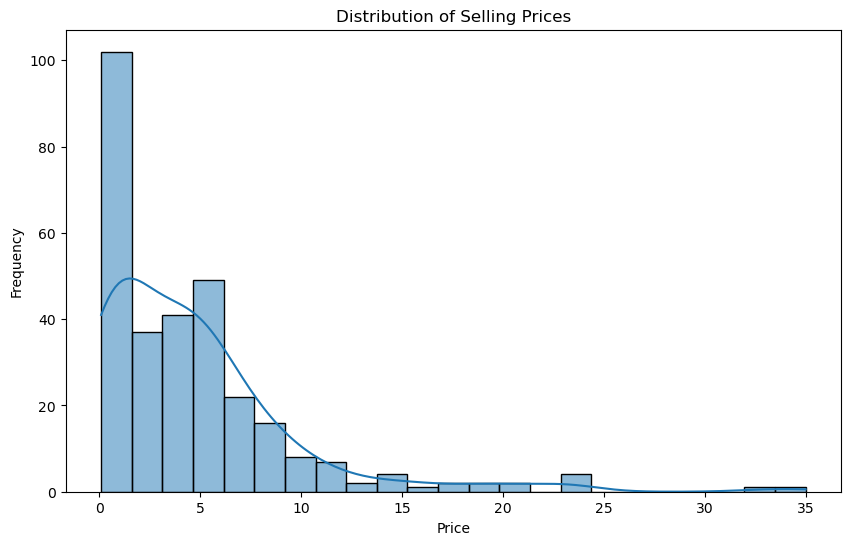

C:\Users\cse\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

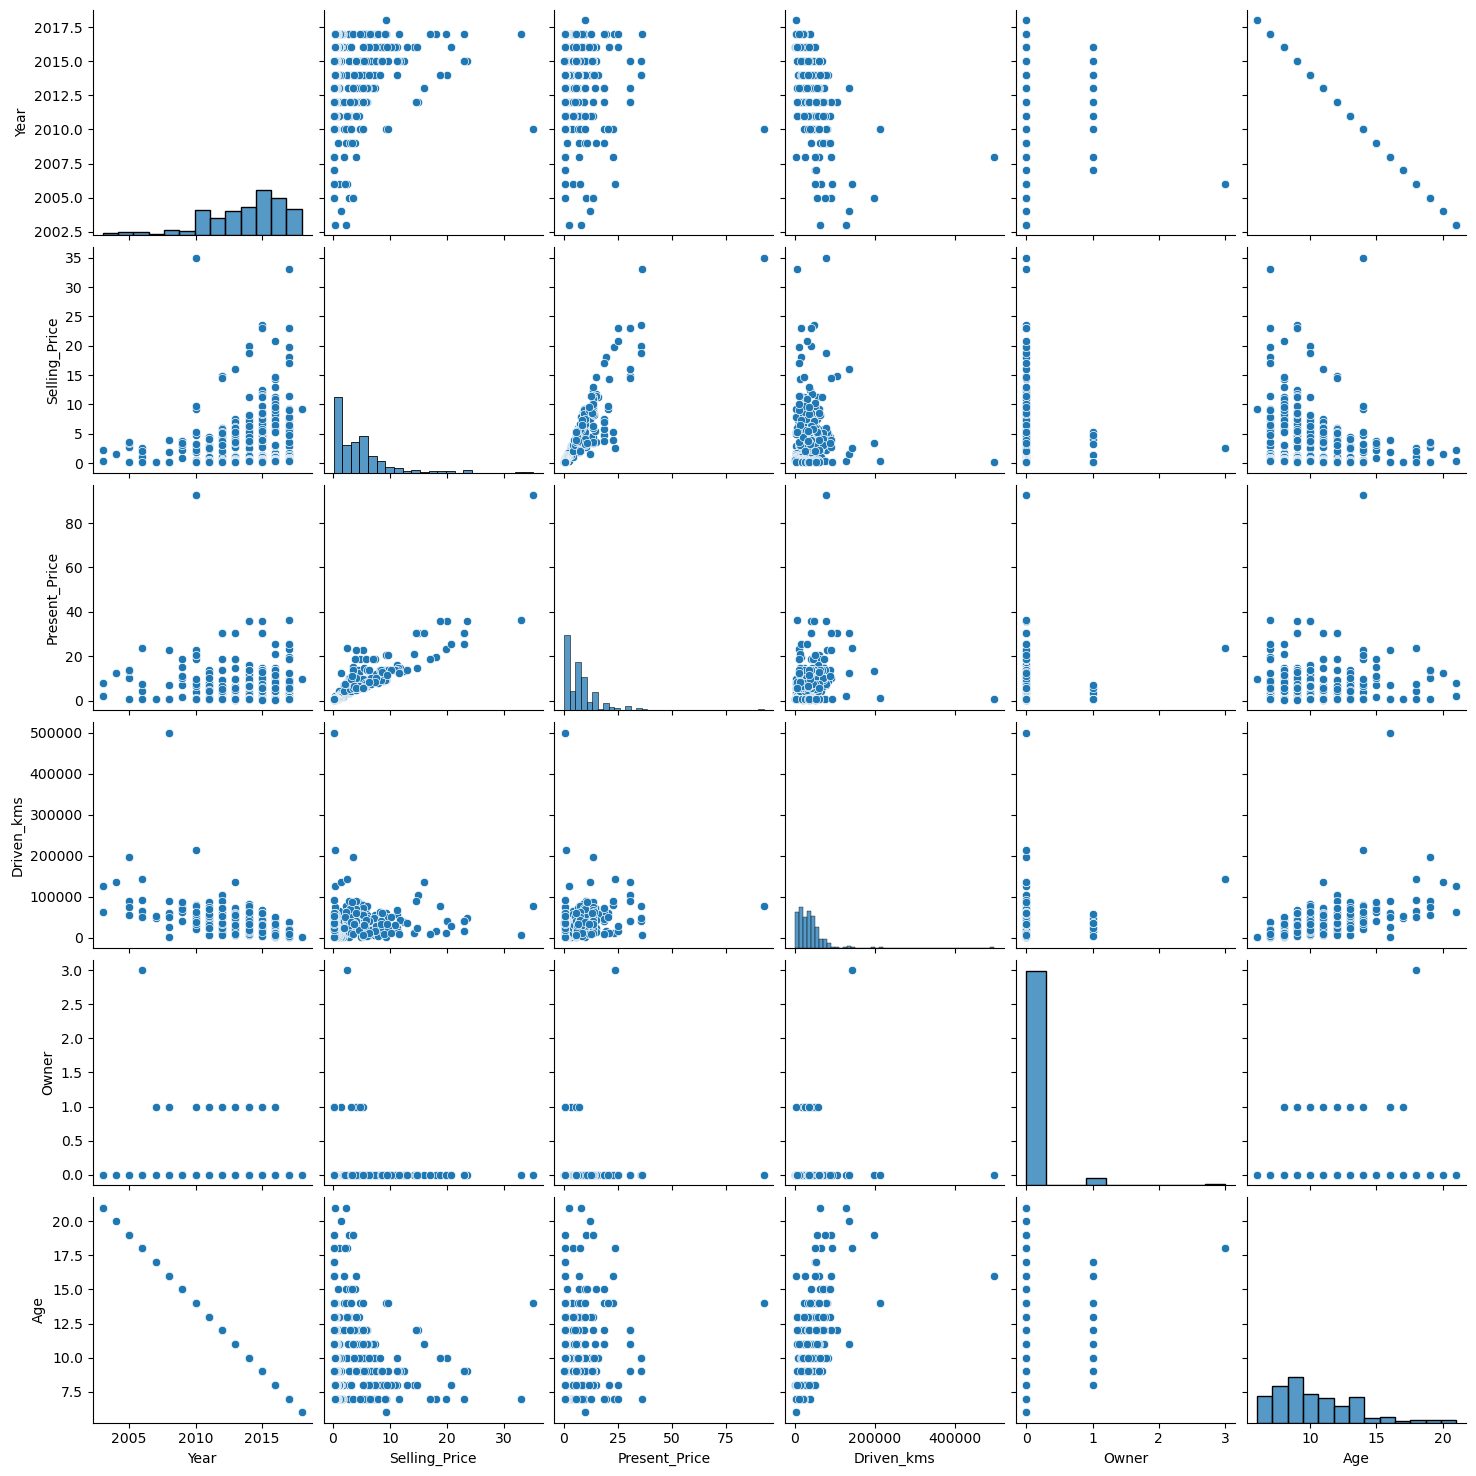

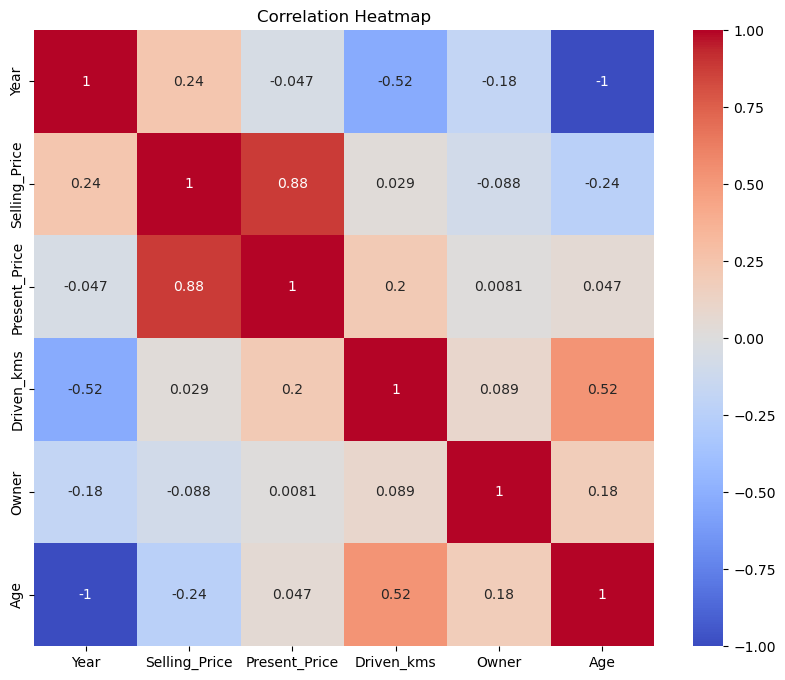

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and target variable
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()

# Select only numerical columns for correlation heatmap
numerical_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

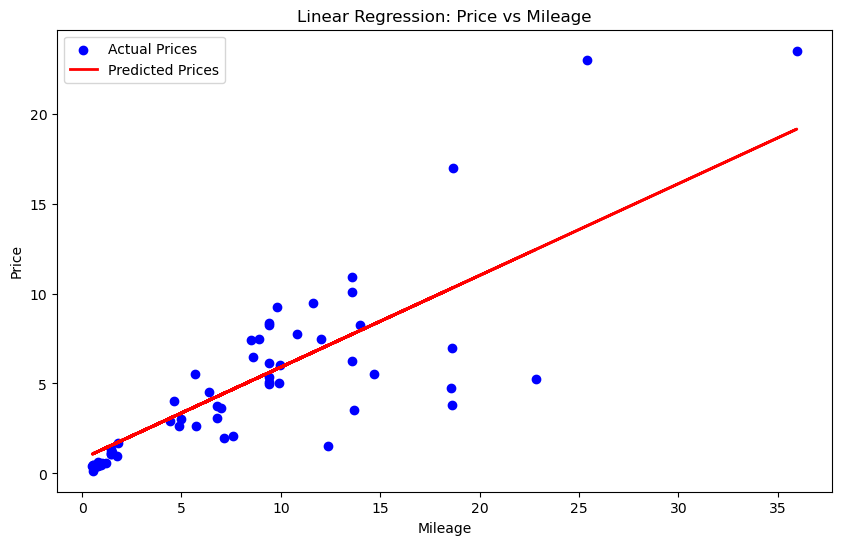

MAE: 1.8067531312373435
MSE: 7.201737126301044
RMSE: 2.683605247852419
R² Score: 0.6873646891852214


In [13]:
# Assuming the correct column name for mileage is 'Present_Price' and 'Selling_Price'
mileage_column = 'Present_Price'
price_column = 'Selling_Price'

# Selecting feature and target variable
X = df[[mileage_column]]
y = df[price_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 1.2163740193336867
MSE: 3.4813498305149064
RMSE: 1.865837568095065
R² Score: 0.8488707839191814


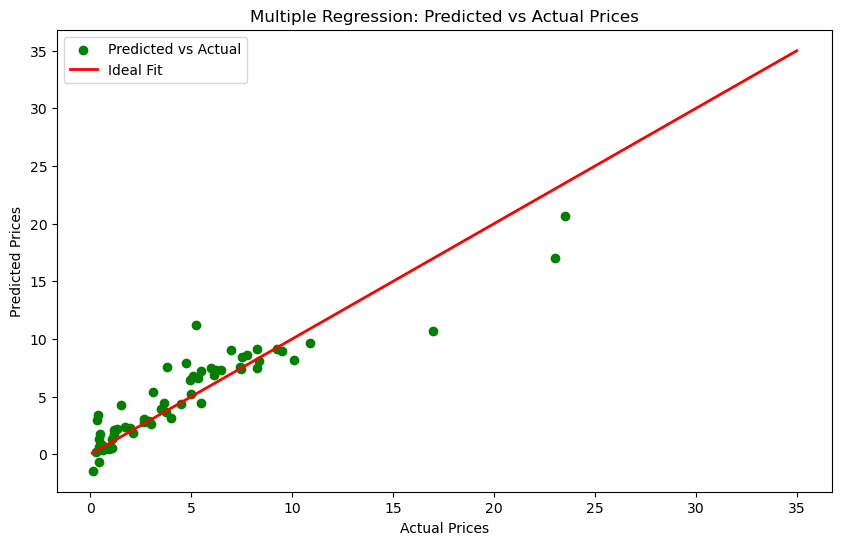

In [14]:

# Convert categorical features to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Rename the 'Driven_kms' column to 'Kms_Driven'
df.rename(columns={'Driven_kms': 'Kms_Driven'}, inplace=True)

# Define the features (X) and target variable (y)
features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
X = df[features]
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Regression: Predicted vs Actual Prices')
plt.legend()
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Convert categorical features to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Rename the 'Driven_kms' column to 'Kms_Driven'
df.rename(columns={'Driven_kms': 'Kms_Driven'}, inplace=True)

# Define the features (X) and target variable (y)
features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
X = df[features]
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regression model
ridge = Ridge()

# Define the grid of hyperparameters
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_ridge = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_ridge.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# # Histogram of residuals
# plt.figure(figsize=(10, 6))
# plt.hist(residuals, bins=30, edgecolor='black')
# plt.axvline(x=0, color='red', linestyle='dashed', linewidth=2, label='Zero Error Line')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.title('Ridge Regression: Residuals Histogram')
# plt.legend()
# plt.show()

Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True}
MAE: 1.2157960331470328
MSE: 3.477976146332449
RMSE: 1.8649332820056723
R² Score: 0.849017239251343
